di project ini saya melakukan analsis terhadap pelanggan pada sebuah gym untuk melihat tingkat churn padad gym ini dan mengembangkan strategi retensi pelanggan

1. Mempelajari cara memprediksi probabilitas churn (untuk bulan berikutnya) bagi setiap pelanggan
2. Membuat segmentasi pengguna dengan memilih kelompok yang paling dominan dan mendeskripsikan fitur-fitur utamanya
3. Menganalisis faktor yang paling memengaruhi churn
4. Menarik kesimpulan dasar dan memberikan rekomendasi terkait cara meningkatkan layanan pelanggan
5. Mengidentifikasi kelompok yang ditargetkan
6. Merekomendasikan langkah-langkah untuk mengurangi churn
7. Mendeskripsikan pola lain yang kamu temui terkait interaksi pelanggan

In [91]:
# Mengimport library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import accuracy_score, precision_score, recall_score



## Mengunduh Data

In [92]:
#Import dataframe
df = pd.read_csv('/datasets/gym_churn_us.csv')
df.head()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

In [94]:
df.shape

(4000, 14)

In [95]:
df.columns

Index(['gender', 'Near_Location', 'Partner', 'Promo_friends', 'Phone',
       'Contract_period', 'Group_visits', 'Age',
       'Avg_additional_charges_total', 'Month_to_end_contract', 'Lifetime',
       'Avg_class_frequency_total', 'Avg_class_frequency_current_month',
       'Churn'],
      dtype='object')

## Melakukan analisis data eksploratif (EDA)

In [96]:
df.describe()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


jika ddilihat dari nilai rata-rata dan standar deviasinya, terdapat perbedaan distribusi nilai. dimana nilai pada fitur "Avg_additional_charges_total" menggunakan nilai ratusan sementara kolom lain hanya satuan, sehingga data yang ada harus di standarisasi

In [97]:
df.groupby('Churn').mean()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month
Churn,,,,,,,,,,,,,
0,0.510037,0.873086,0.534195,0.353522,0.903709,5.747193,0.464103,29.976523,158.445715,5.283089,4.711807,2.024876,2.027882
1,0.510839,0.768143,0.355325,0.183789,0.902922,1.728558,0.268615,26.989632,115.082899,1.662582,0.990575,1.474995,1.044546


jika dilihat dari rata-ratanya, kelompok churn pada fitur promo_friends dan group_visits lebih rendah dari kelompok non churn. 
pada kelompok churn pada fitur contract_period rata-rata hanya mengambil 1 bulan kontrak, sedangkan padda kelompok non churn rata-rata mengambil 6 bulan kontrak

In [99]:
def feat_hist3(x, group_col, key_cols):
    x_new = x.copy()
    x_new[key_cols] = df[key_cols]
    for c in key_cols:
        sns.displot(data= x_new, x= c, hue = group_col,bins=10, kde= True,
                    palette = 'pastel', stat = 'density')
        plt.title("{} - {}".format(c, group_col))
        plt.show()

In [100]:
df.groupby('Churn')['Near_Location'].value_counts()

Churn  Near_Location
0      1                2566
       0                 373
1      1                 815
       0                 246
Name: Near_Location, dtype: int64

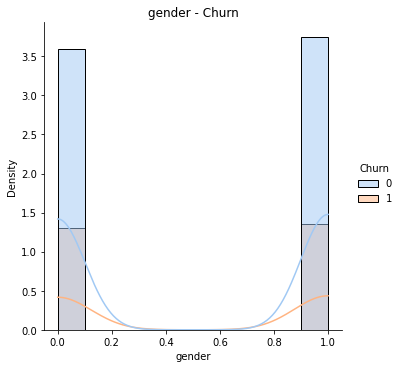

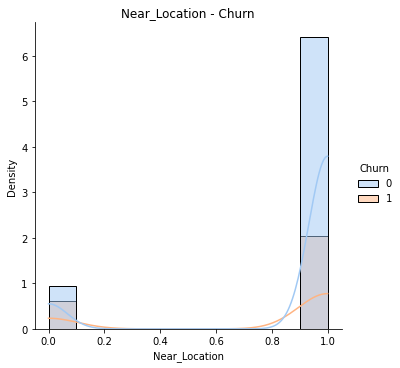

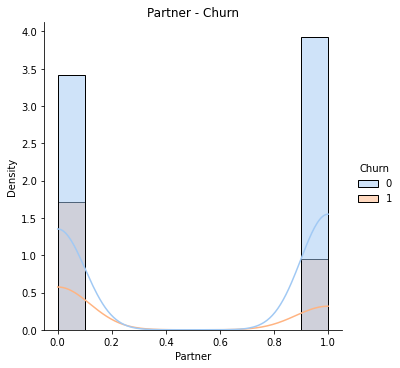

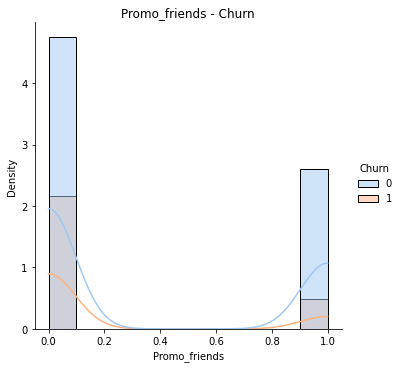

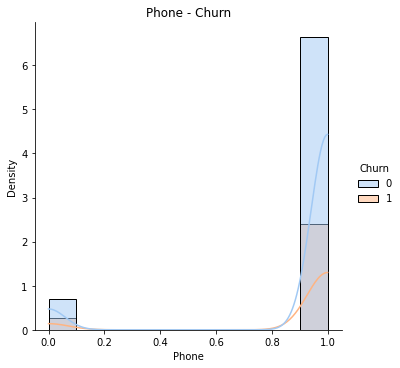

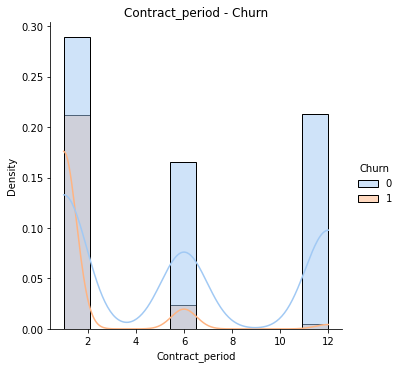

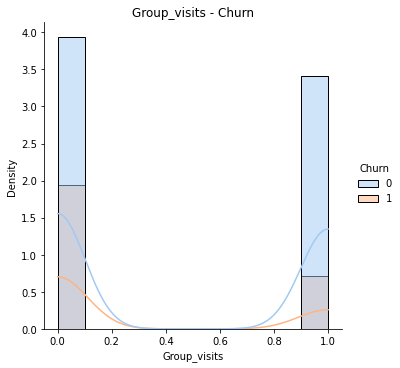

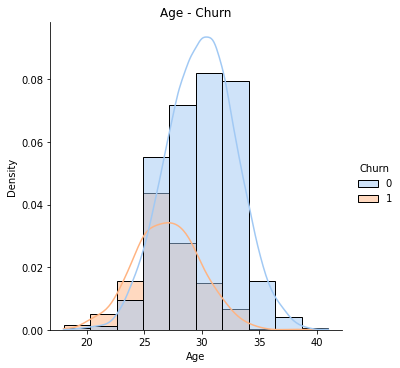

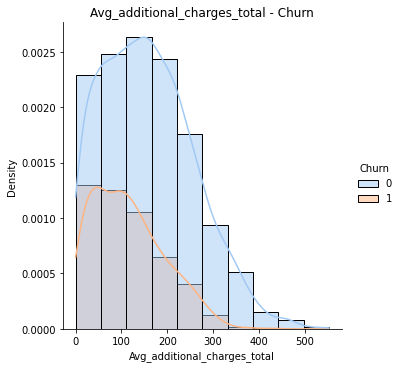

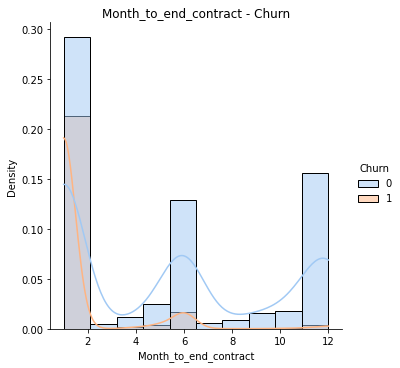

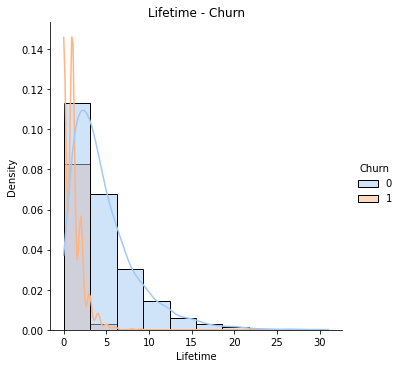

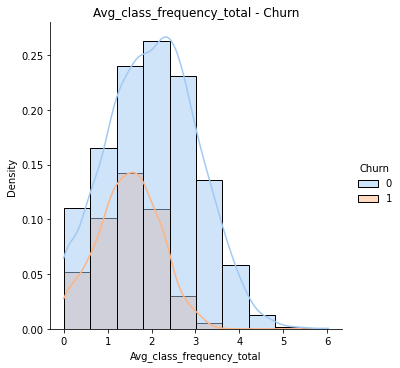

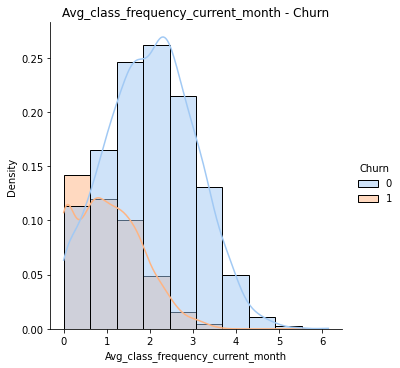

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


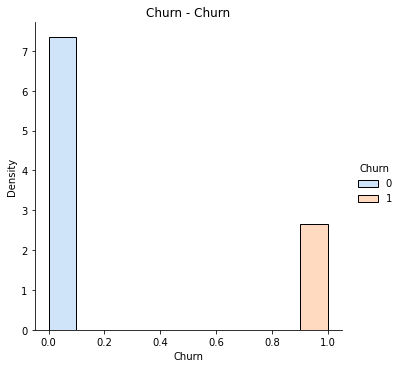

In [101]:
#membuat histogram masing-masing fitur berdasarkan churn
feat_hist3(df,'Churn', df.columns)

sekilas dilihat dapat disimpulkan bahwa: 
1. orang yang berumus 25-29 lebih sering keluar dari gym
2. orang yang termasuk partner di gym lebih sedikit keluar daripada yang bukan partner.
3. orang yang keluar rata-rata mengeluarkan biaya tambahan berkisar 0-150, sedangkan orang yang tidak keluar biasanya mengeluarkan biaya tambahan sebesar 0-220
4. orang yang keluar biasanya datang hanya 0-1x seminggu, sedangkan orang yang tidak keluar biasanya datang 2-3x seminggu

In [102]:
#membuat tabel korelasi antar fitur pada dataframe
df.corr()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
gender,1.000000,0.006699,-0.010463,-0.005033,-0.008542,0.000502,0.017879,0.013807,-0.009334,-0.001281,0.013579,0.014620,0.009156,0.000708
Near_Location,0.006699,1.000000,-0.005119,0.210964,-0.015763,0.150233,0.154728,0.058358,0.040761,0.143961,0.070921,0.043127,0.062664,-0.128098
Partner,-0.010463,-0.005119,1.000000,0.451960,0.009970,0.306166,0.022710,0.047480,0.022941,0.294632,0.061229,0.024938,0.045561,-0.157986
Promo_friends,-0.005033,0.210964,0.451960,1.000000,0.001982,0.244552,0.120170,0.050113,0.036898,0.239553,0.072721,0.028063,0.053768,-0.162233
Phone,-0.008542,-0.015763,0.009970,0.001982,1.000000,-0.006893,-0.010099,-0.011403,0.009279,-0.011196,-0.018801,0.008340,0.013375,-0.001177
Contract_period,0.000502,0.150233,0.306166,0.244552,-0.006893,1.000000,0.169991,0.138249,0.111445,0.973064,0.170725,0.096211,0.159407,-0.389984
Group_visits,0.017879,0.154728,0.022710,0.120170,-0.010099,0.169991,1.000000,0.080934,0.032079,0.163703,0.075853,0.056695,0.075923,-0.175325
Age,0.013807,0.058358,0.047480,0.050113,-0.011403,0.138249,0.080934,1.000000,0.080240,0.134511,0.164693,0.119953,0.183095,-0.404735
Avg_additional_charges_total,-0.009334,0.040761,0.022941,0.036898,0.009279,0.111445,0.032079,0.080240,1.000000,0.113958,0.079028,0.044426,0.079570,-0.198697
Month_to_end_contract,-0.001281,0.143961,0.294632,0.239553,-0.011196,0.973064,0.163703,0.134511,0.113958,1.000000,0.161078,0.085387,0.147605,-0.381393


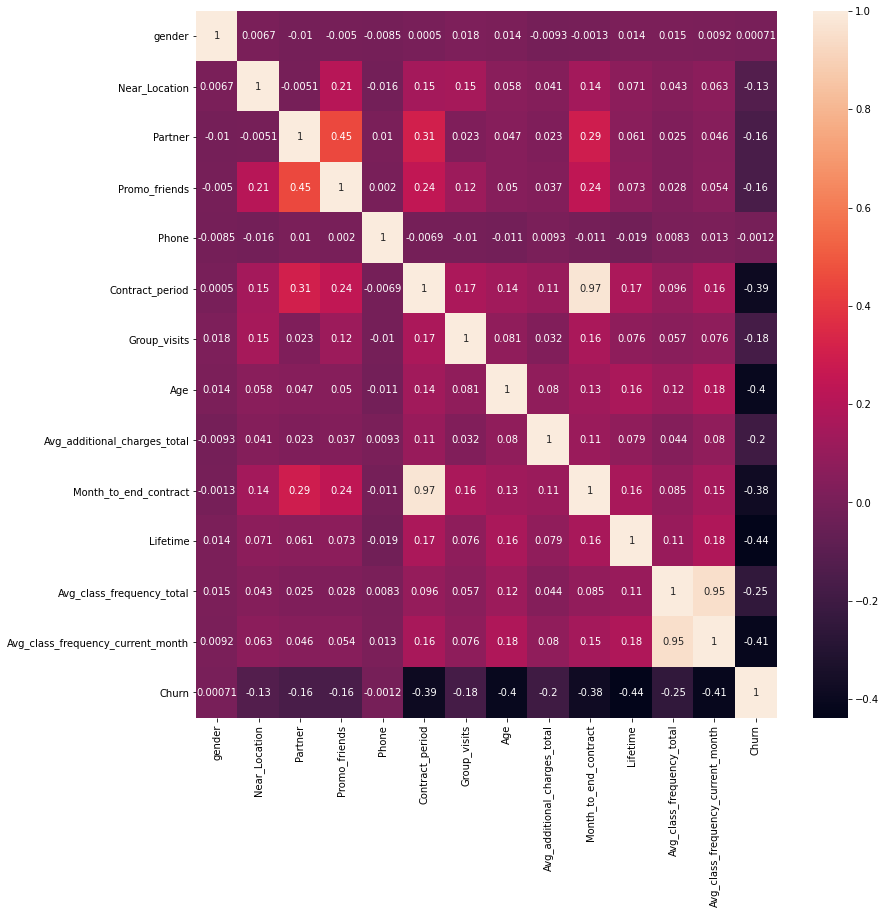

In [103]:
#membuat heatmap korelasi
plt.figure(figsize = (13,13))
sns.heatmap(df.corr(), annot= True)
plt.show()

jika melihat dari matriks korelasi, terdapat 2 pasangan fitur yang berkolerasi sangat kuat, yaitu:
1. 'Month_to_end_contract' dengan 'Contract_period'
2. 'Avg_class_frequency_current_month' dengan 'Avg_class_frequency_total'

##  Membangun model untuk memprediksi churn pengguna

In [104]:
# membagi pengguna

X= df.drop('Churn', axis= 1)
y= df['Churn']


X_train, X_val, y_train, y_val = train_test_split(X,y, test_size= 0.2, random_state=0)

### regresi logistik

In [105]:
# regresi logistik
# melatih model regresi logistik
lr_model = LogisticRegression(random_state = 0)
lr_model.fit(X_train, y_train)

/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

In [106]:
#membuat prediksi dan probabilitas
y_pred_lr = lr_model.predict(X_val)
y_proba_lr = lr_model.predict_proba(X_val)

In [107]:
print('Accuracy score for logistic regression is: {:.2f}'.format(accuracy_score(y_val, y_pred_lr)))
print('Precision score for logistic regression is: {:.2f}'.format(precision_score(y_val, y_pred_lr)))
print('Recall score for logistic regression is: {:.2f}'.format(recall_score(y_val, y_pred_lr)))

Accuracy score for logistic regression is: 0.92
Precision score for logistic regression is: 0.87
Recall score for logistic regression is: 0.81


### random forest

In [108]:
#melatih model random forest
rf_model = RandomForestClassifier(n_estimators= 100, random_state= 0)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [109]:
#membuat prediksi dan probabilitas
y_pred_rf = rf_model.predict(X_val)
y_proba_rf = rf_model.predict_proba(X_val)

In [110]:
print('Accuracy score for logistic regression is: {:.2f}'.format(accuracy_score(y_val, y_pred_rf)))
print('Precision score for logistic regression is: {:.2f}'.format(precision_score(y_val, y_pred_rf)))
print('Recall score for logistic regression is: {:.2f}'.format(recall_score(y_val, y_pred_rf)))

Accuracy score for logistic regression is: 0.92
Precision score for logistic regression is: 0.84
Recall score for logistic regression is: 0.82


setelah dilakukan logistic regression dan random forest clasifier ternyata hasil dari keduanya tidak jauh berbeda, hanya berbeda sekitar 1-3%. bahkan pada nilai accuracy antara kedua model tidak berubah

## Membuat klaster pengguna

In [111]:
#standarisasi data
sc= StandardScaler()
x_sc= sc.fit_transform(X)

In [112]:
#membuat fungsi linkage
linked= linkage(x_sc, method='ward')

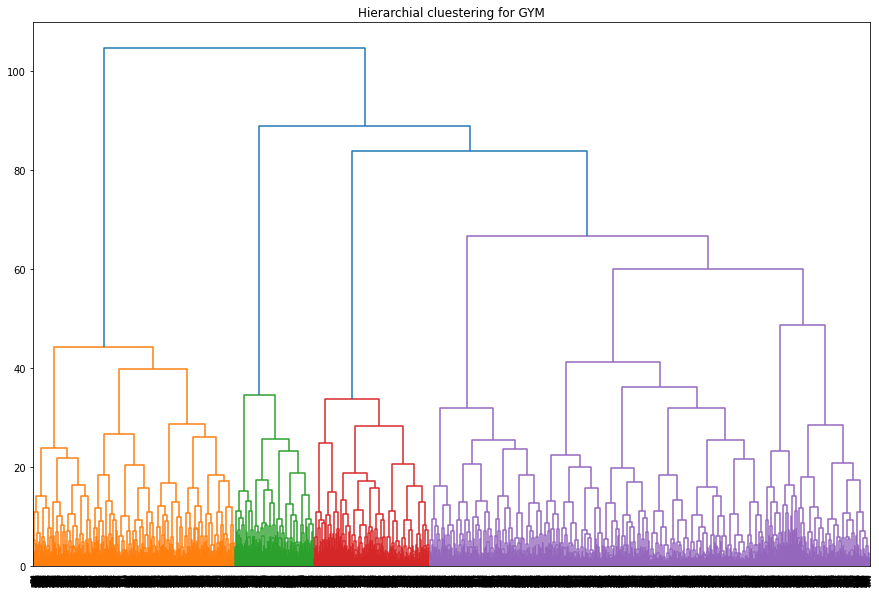

In [113]:
#menampilkan dendrogram dari dataframe
plt.figure(figsize=(15,10))
dendrogram(linked, orientation= 'top')
plt.title('Hierarchial cluestering for GYM')
plt.show()

terlihat terlalu banyak pengklasteran yang dilakukan, maka dengan ini kita perlu menetapkan berapa kluster yang kita inginkan agar data bisa terlihat lebih jelas

In [114]:
#melatih model pengklasteran
km = KMeans(n_clusters= 5)
labels = km.fit_predict(X)

In [115]:
#menetapkan pengklasteran 
df['cluster_km'] = labels
df.groupby('cluster_km').count()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
cluster_km,,,,,,,,,,,,,,
0,966,966,966,966,966,966,966,966,966,966,966,966,966,966
1,281,281,281,281,281,281,281,281,281,281,281,281,281,281
2,1030,1030,1030,1030,1030,1030,1030,1030,1030,1030,1030,1030,1030,1030
3,715,715,715,715,715,715,715,715,715,715,715,715,715,715
4,1008,1008,1008,1008,1008,1008,1008,1008,1008,1008,1008,1008,1008,1008


In [116]:
#melihat nilai rata-ratat fitur sesudah pengklasteran
df.groupby('cluster_km').mean()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
cluster_km,,,,,,,,,,,,,,
0,0.508282,0.839545,0.490683,0.317805,0.900621,4.701863,0.423395,29.392340,173.303504,4.328157,3.745342,1.889680,1.777950,0.236025
1,0.462633,0.857651,0.516014,0.334520,0.928826,5.800712,0.434164,29.889680,354.568937,5.341637,4.434164,2.010154,2.002203,0.046263
2,0.519417,0.841748,0.454369,0.279612,0.899029,4.317476,0.409709,28.969903,104.342125,4.004854,3.563107,1.843448,1.700045,0.328155
3,0.525874,0.881119,0.513287,0.345455,0.896503,5.429371,0.430769,29.327273,249.225721,5.041958,4.137063,1.910871,1.849724,0.176224
4,0.504960,0.825397,0.489087,0.295635,0.908730,4.190476,0.384921,28.905754,34.782813,3.848214,3.379960,1.846002,1.700882,0.353175


setelah dilihat dari rata-ratanya, yang paling mencolok adalah kluster 1 menjadi kluster paling hemat mengeluarkan uang untuk layanan lain

In [117]:
df[df['cluster_km'] == 2]['Churn'].value_counts()

0    692
1    338
Name: Churn, dtype: int64

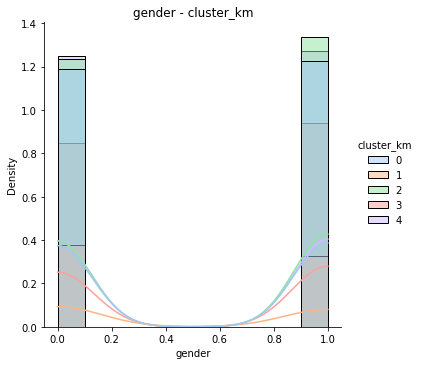

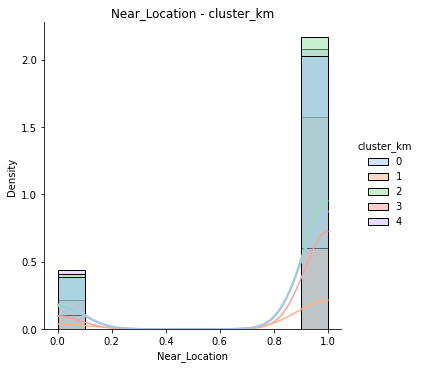

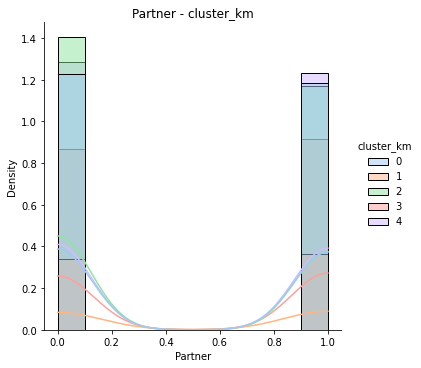

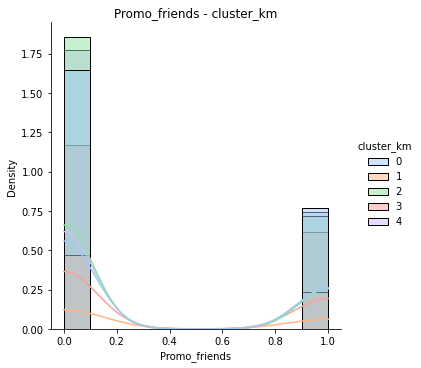

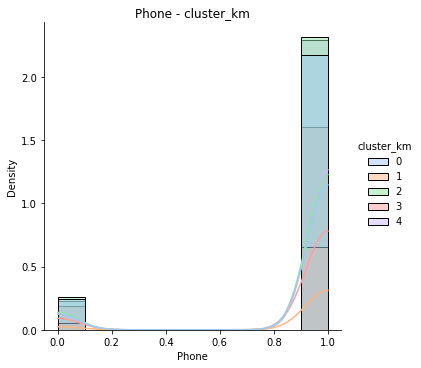

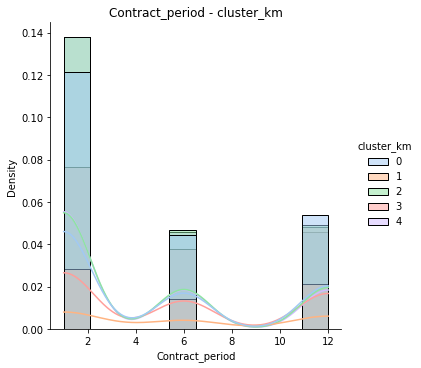

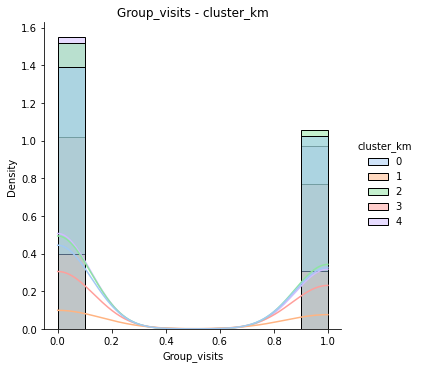

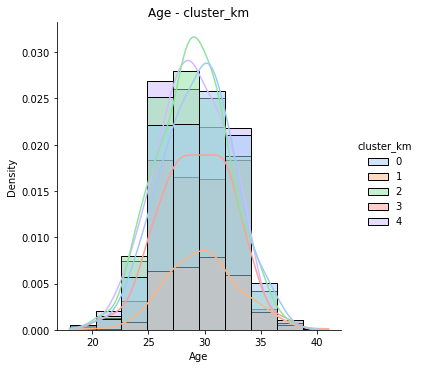

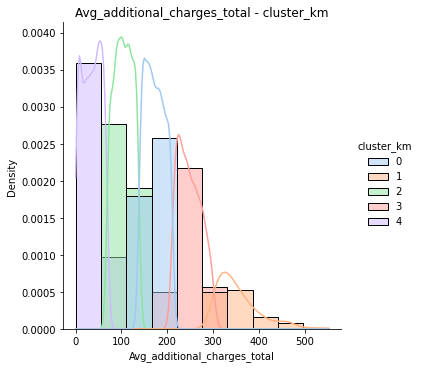

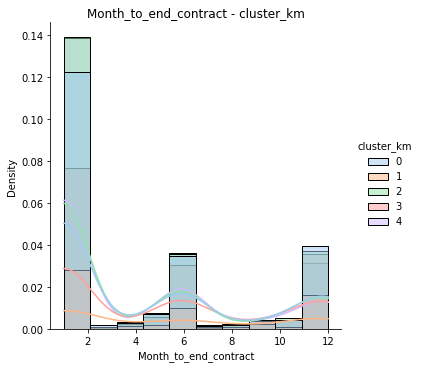

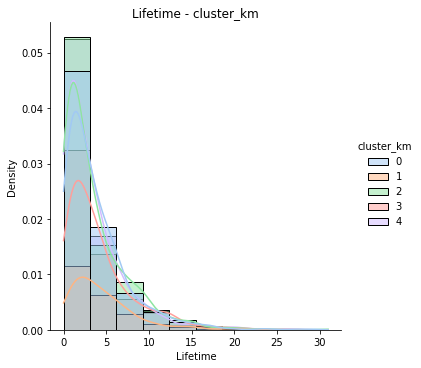

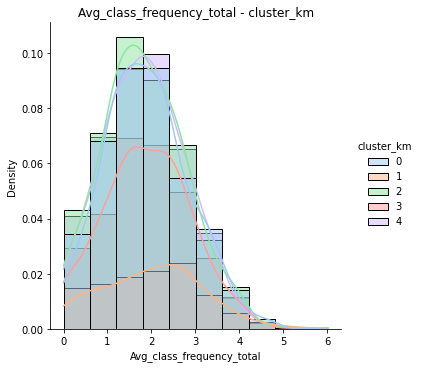

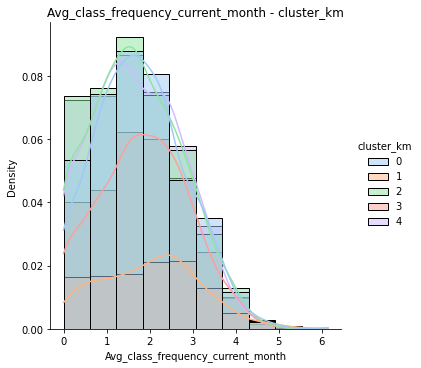

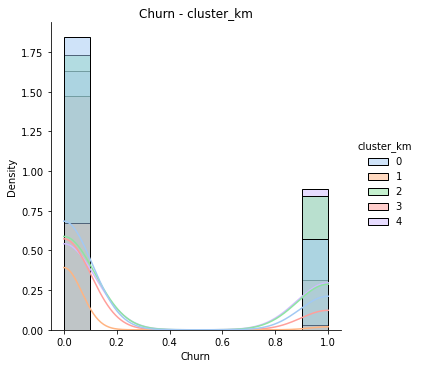

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


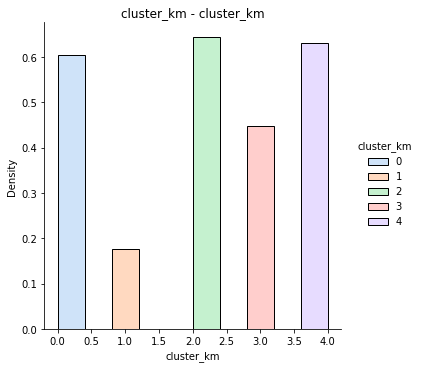

In [118]:
#membuat histogram masing-masing fitur berdasarkan kbluster
feat_hist3(df, 'cluster_km', df.columns)

setelah dilakukan pengklasteran bisa disimpulkan bahwa:
1. kluster 4 adalah kluster terbanyak yang keluar dari gym
2. kluster 1 merupakan kluster yang paling banyak mengeluarkan biaya tambahan berkisar 300-500, dan klaster ini biasanya datang sebanyak 1-3x dalam seminggu pada bulan ini, rata-rata berumur 29-32 tahun dan kluster ini dominan bukan partner
3. kluster yang keluar berbanding lurus dengan pengeluaran tambahannya. semakin dikit pengeluaran tambahan maka semakin banyak juga yang keluar
4. kluster 0 bisa dibilang menjadi kluster yang setia dikarenakan churn 0 paling tinggi tetapi churn 1 menduduki peringkat 3, dan kluster ini biasanya mengambil kontrak 12 bulan dan mereka menggunakan promo_friend

In [119]:
df.groupby('cluster_km')['Churn'].mean()*100

cluster_km
0    23.602484
1     4.626335
2    32.815534
3    17.622378
4    35.317460
Name: Churn, dtype: float64

jika dilihat dari data diatas kluster 2 menjadi kluster yang tingkat churn nya paling rendah dengan tingkat churn 4%. sedangkan kluster 1 dan 3 menjadi kluster dengan tingkat churn yang tinggi

## Kesimpulan

setelah melewati beberapa pengamatan, mungkin dibawah ini adalah beberapa poin kesimpulan dari proyek kali ini:
1. orang yang keluar biasanya datang hanya 0-1x seminggu, sedangkan orang yang tidak keluar biasanya datang 2-3x seminggu. 
2. orang yang mengambil kontrak 1 bulan saja lebih sering keluar dari gym dibandingkan dengan yang mengambil kontrak 6 bulan dan 12 bulan. mungkin kita memberikan diskon pada perpanjangan selanjutnya agar mereka tetap melanjutkan berlangganan
3. memberi perhatian lebih pada orang di kluster 0 dikarenakan kluster ini merupakan kluster yang rata-rata mengambil kontrak panjang, mungkin kita bisa melakukan survey terhadap kluster ini tentang pelayanan lain yang perlu dihadirkan agar kluster ini bisa memberikan keuntungan yang lebih lewat pelayanan lain yang kita miliki